In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sys
sys.path.append('..')

In [3]:
file_path = "../data/raw/raw_analyst_ratings.csv"
from scripts.file_loader import load_file

In [4]:
news_data = load_file(file_path)
news_data.head()

File successfully loaded: ../data/raw/raw_analyst_ratings.csv


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


#### Shape or Size of news data

In [5]:
news_data.shape

(1407328, 6)

#### Checking news data for missing values

In [6]:
news_data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

#### date to datetime for analysis

In [7]:
# Convert date to datetime for analysis
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')
news_data.head(3)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A


#### Basic Statistics for Headline Lengths


In [8]:
news_data['headline_length'] = news_data['headline'].apply(len)
length_stats = news_data['headline_length'].describe()

print("Basic Statistics for Headline Lengths:")
print(length_stats)

Basic Statistics for Headline Lengths:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


#### Count the Number of Articles per Publisher

In [9]:
publisher_counts = news_data['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)


Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


#### Analyze Publication Dates

In [10]:
news_data['day_of_week'] = news_data['date'].dt.day_name()
publication_trends = news_data['day_of_week'].value_counts()
print("\nPublication Trends (Articles by Day of the Week):")
print(publication_trends)


Publication Trends (Articles by Day of the Week):
day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


#### Visualizing Headline Lengths

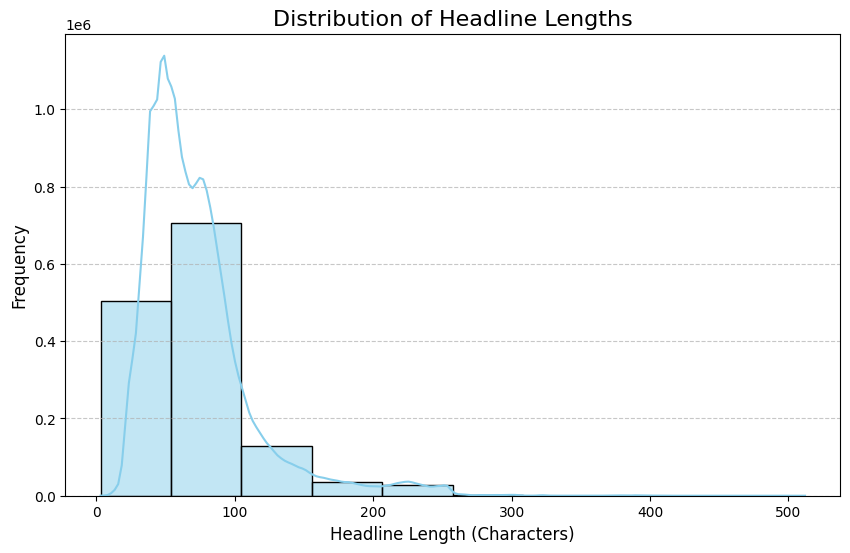

In [11]:

# 1. Visualizing Headline Lengths
plt.figure(figsize=(10, 6))
sns.histplot(news_data['headline_length'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Visualizing Article Counts per Publisher

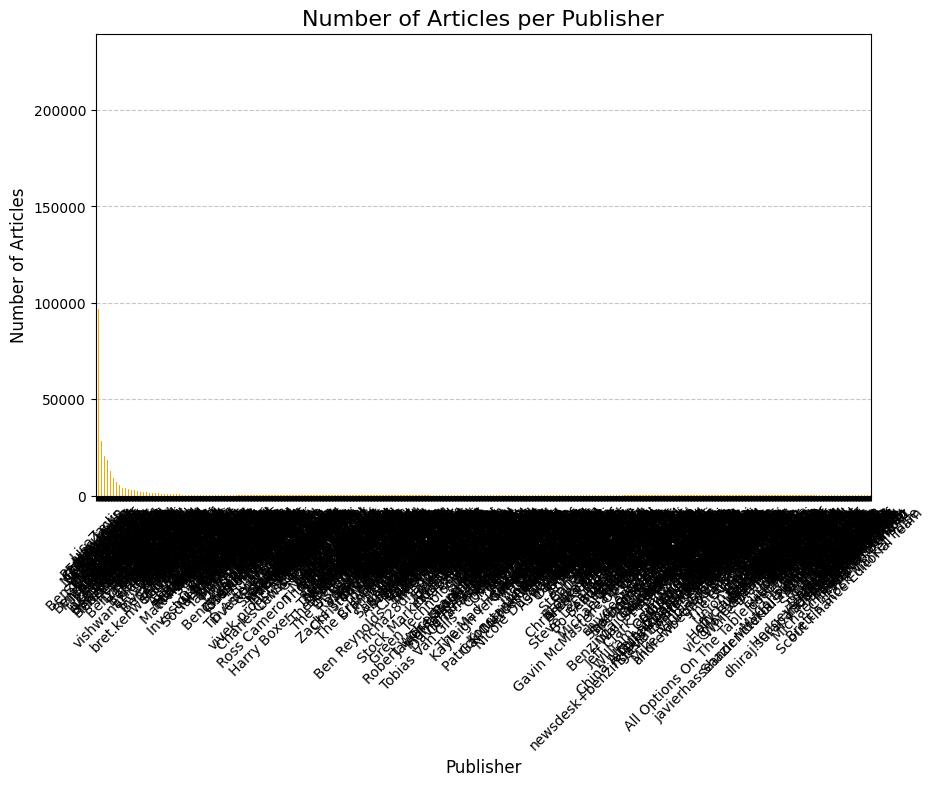

In [12]:
# 2. Visualizing Article Counts per Publisher
plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='bar', color='orange')
plt.title('Number of Articles per Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Visualizing Publication Trends by Day of the Week

C:\Users\Coop\AppData\Local\Temp\ipykernel_10532\2313654122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publication_trends.index, y=publication_trends.values, palette='viridis')


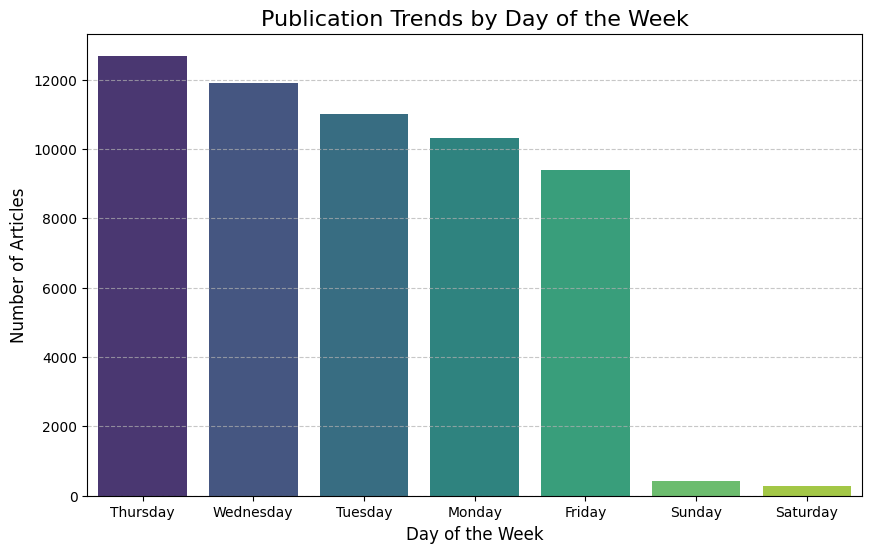

In [13]:
# 3. Visualizing Publication Trends by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x=publication_trends.index, y=publication_trends.values, palette='viridis')
plt.title('Publication Trends by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Text Analysis(Sentiment analysis & Topic Modeling)

In [14]:
from scripts.financial_analysis import get_sentiment

news_data['sentiment_score'] = news_data['headline'].apply(get_sentiment)

In [15]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,sentiment_score
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday,0.0


###### Convert >0 into positive, <0 into negative and 0 into neutral

In [16]:
news_data['sentiment'] = news_data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [17]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,sentiment_score,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday,0.0,neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday,0.0,neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday,0.0,neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday,0.0,neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday,0.0,neutral


### Number of Published articles with respect to sentiment categories


In [18]:
# View sentiment counts
sentiment_counts = news_data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
neutral     934928
positive    341161
negative    131239
Name: count, dtype: int64


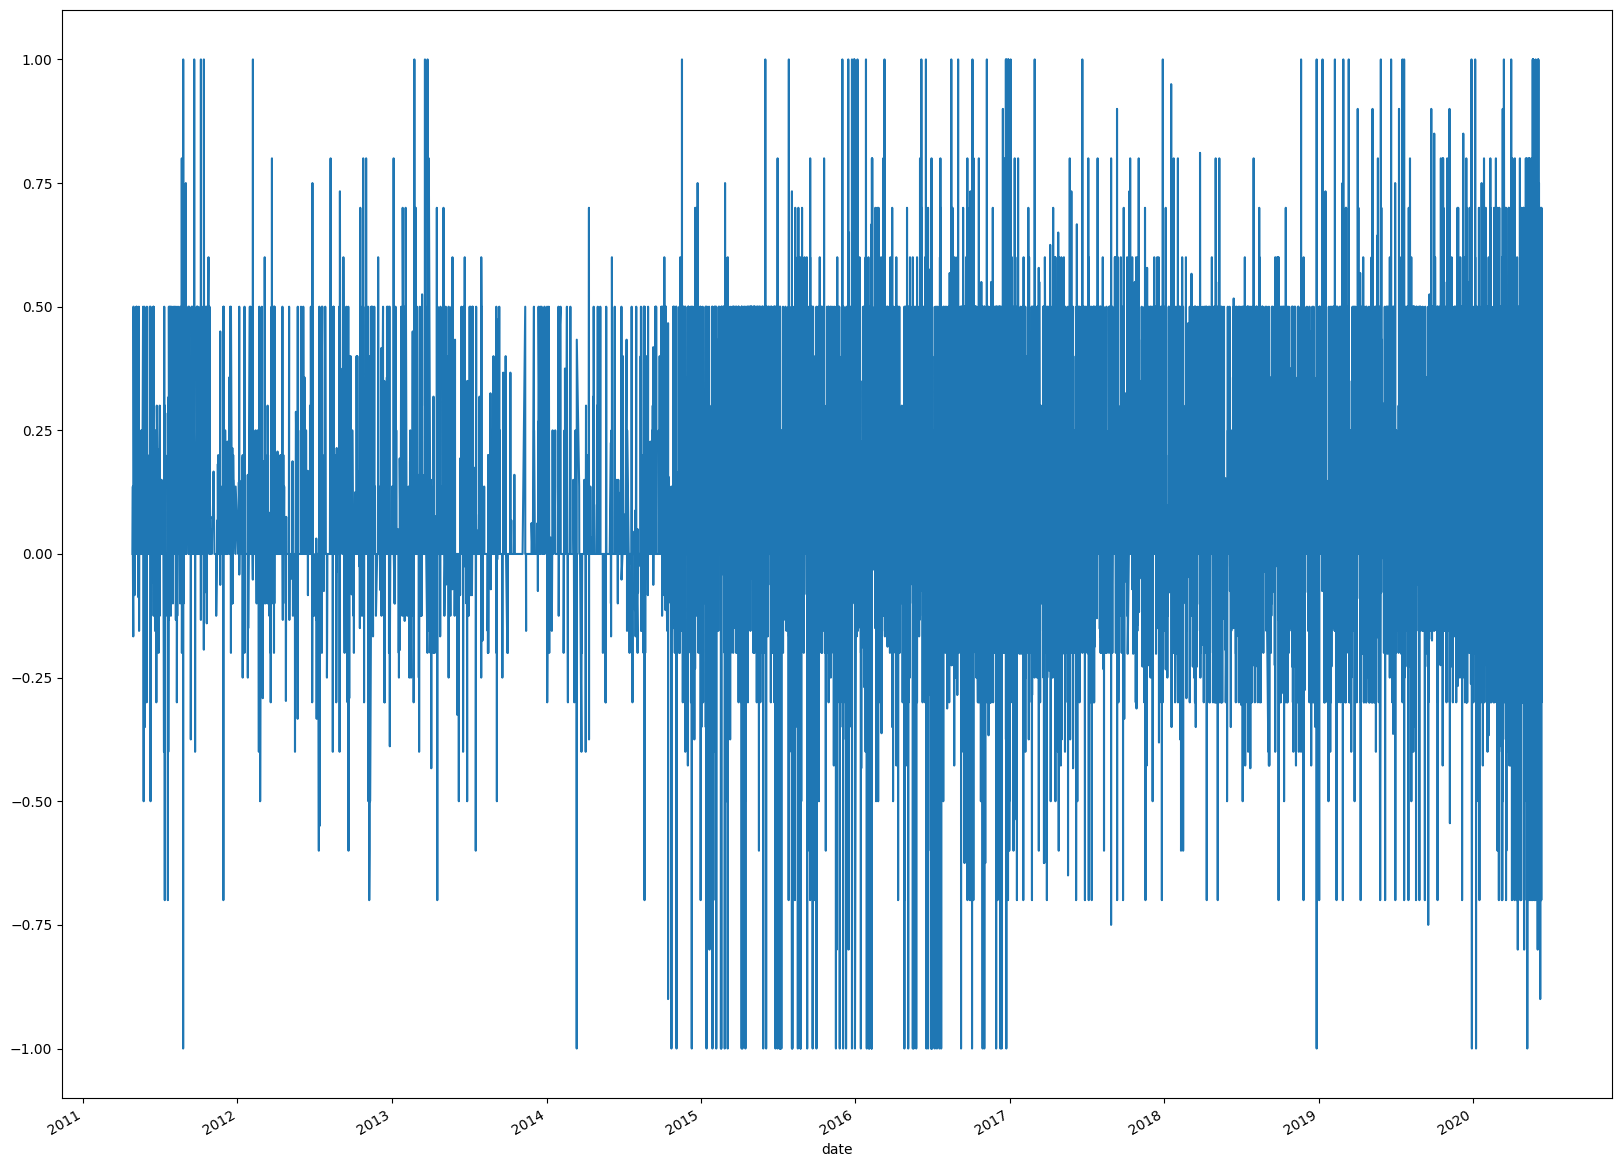

In [19]:
news_data.groupby('date')['sentiment_score'].mean().plot(figsize=(20,16));

## Time Series Analysis:

In [20]:
# news_data['date'] = pd.to_datetime(news_data['date'], utc=True)

# # news_data['date'].dt.to_period('M').value_counts().sort_index().plot(kind="line",figsize=(20,6),title='number of published article in specific date',xlabel='Year',ylabel='number of publisher')

# news_data['date'].dt.to_period('Y').value_counts().sort_index().plot(kind="line",figsize=(20,6),title='number of published article in specific date',xlabel='Year',ylabel='number of publisher')

# # There seem to be specific peak periods where the number of published articles significantly increases. Identifying these periods can provide insights into factors driving the surge in publications.

In [21]:
### Publication Frequency Over Time ###
# Group by date and count the number of publications
news_data['publication_date'] = news_data['date'].dt.date
daily_counts = news_data.groupby('publication_date').size()

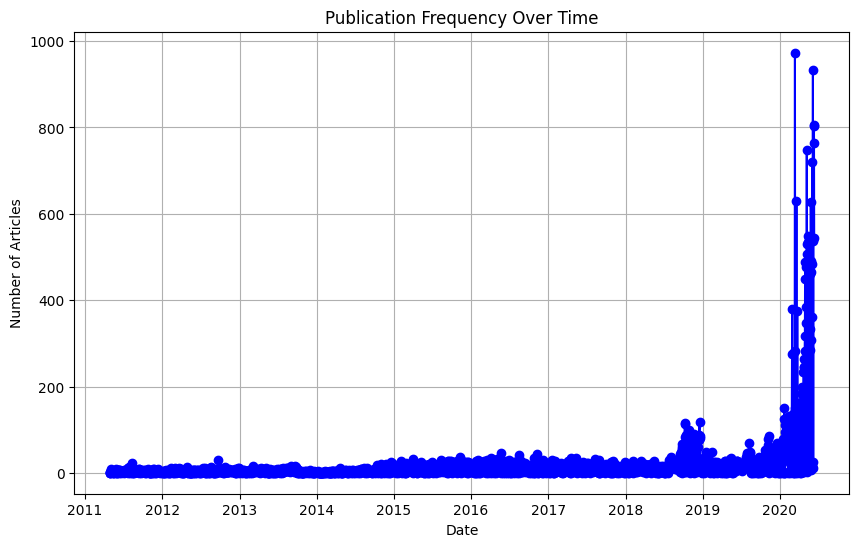

In [22]:
# Plot daily publication frequency
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line', marker='o', color='blue')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


In [23]:
### Publishing Times Analysis ###
# Extract hour from the `date` column
news_data['publication_hour'] = news_data['date'].dt.hour

# Count the number of publications by hour
hourly_counts = news_data['publication_hour'].value_counts().sort_index()


C:\Users\Coop\AppData\Local\Temp\ipykernel_10532\661213086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')


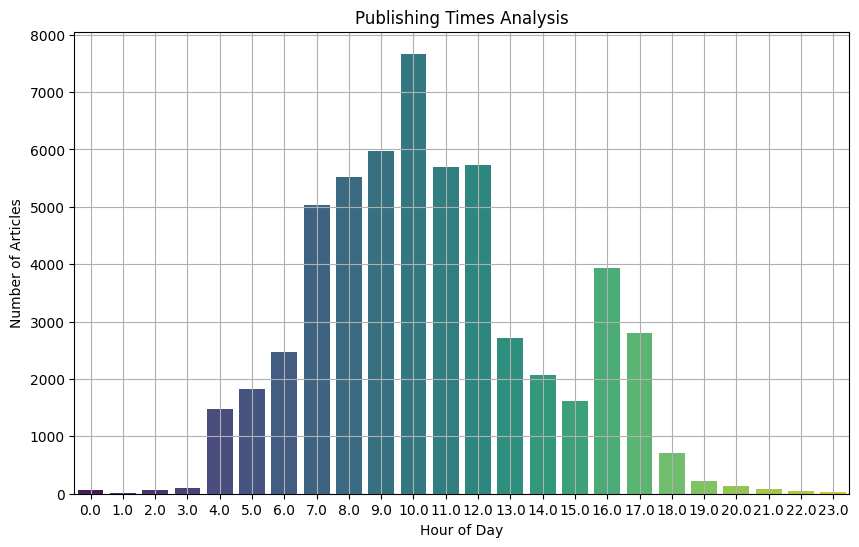

In [24]:
# Plot publishing times
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')
plt.title('Publishing Times Analysis')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show();

# Publisher Analysis

##### Show top 20 publisher by number of published articles

In [25]:
publisher_counts = news_data['publisher'].value_counts()
publisher_counts.head(20)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

##### Show last 20 publisher by number of published articles


In [26]:
publisher_counts.tail(20)


publisher
LeftCoastHedgie        1
ProactiveInvestors     1
Frank Zorrila          1
Goatmug Blog           1
Christian Fromhertz    1
swenstock              1
BuyAndHoldPlus         1
cyrus21                1
Stan Blacker           1
pagetraffic            1
GeoInvesting           1
Tom Kee                1
Greg W. Harmon         1
TradingPub             1
Ethan Joseph           1
Matthew Ely            1
Frank Ochoa            1
Jeremie Capron         1
Marvin Dumont          1
Igor Gonta             1
Name: count, dtype: int64

#### Sentiment analysis for Top Three publisher

In [27]:
from scripts.financial_analysis import getSentimentAnalysisOfPublisher
getSentimentAnalysisOfPublisher(news_data,'Paul Quintaro')

KeyError: 'sentiment_score_word'

In [ ]:
### Publishers Contribution ###
# Count articles per publisher
publisher_counts = news_data['publisher'].value_counts()

In [ ]:
# Plot publisher contribution
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette="magma")
plt.title("Publisher Contribution to the News Feed")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [45]:
### Extract Unique Domains from Email Addresses ###
# Identify if a publisher name is an email address
news_data['is_email'] = news_data['publisher'].str.contains('@')

# Extract domain from email addresses
news_data['domain'] = news_data['publisher'].apply(
    lambda x: x.split('@')[1] if '@' in x else None
)

# Count the number of articles by domain
domain_counts = news_data['domain'].value_counts()

In [ ]:
news_data.head()

In [48]:
news_data.to_csv("../data/processed/news_data.csv", index=False)
